In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
API_KEY = os.getenv('API_KEY')

In [3]:
import json

In [7]:
import requests, base64

invoke_url = "https://ai.api.nvidia.com/v1/cv/baidu/paddleocr"

with open("ocrimage-min.jpg", "rb") as f:
    image_b64 = base64.b64encode(f.read()).decode()
print(len(image_b64))
assert len(image_b64) < 180_000, \
  "To upload larger images, use the assets API (see docs)"

headers = {
  "Authorization": f"Bearer {API_KEY}",
  "Accept": "application/json"
}

payload = {
  "input": [
    {
      "type": "image_url",
      "url": f"data:image/png;base64,{image_b64}"
    }
  ]
}

response = requests.post(invoke_url, headers=headers, json=payload)

146996
{'data': [{'index': 0, 'text_detections': [{'text_prediction': {'text': 'Machhapuchchhre Bank Limited', 'confidence': 0.9832963347434998}, 'bounding_box': {'points': [{'x': 0.12868217054263567, 'y': 0.03541666666666667}, {'x': 0.3286821705426357, 'y': 0.0375}, {'x': 0.3286821705426357, 'y': 0.05208333333333334}, {'x': 0.12868217054263567, 'y': 0.05}]}}, {'text_prediction': {'text': 'ACNa', 'confidence': 0.7684979438781738}, 'bounding_box': {'points': [{'x': 0.5953488372093023, 'y': 0.036458333333333336}, {'x': 0.6294573643410853, 'y': 0.036458333333333336}, {'x': 0.6294573643410853, 'y': 0.04791666666666667}, {'x': 0.5953488372093023, 'y': 0.04791666666666667}]}}, {'text_prediction': {'text': 'For Banks Use Only  ar a ', 'confidence': 0.8132356405258179}, 'bounding_box': {'points': [{'x': 0.6651162790697673, 'y': 0.053125}, {'x': 0.8728682170542637, 'y': 0.053125}, {'x': 0.8728682170542637, 'y': 0.06354166666666666}, {'x': 0.6651162790697673, 'y': 0.06354166666666666}]}}, {'text

In [10]:
formatted_output = json.dumps(response.json(), indent=4, ensure_ascii=False)

print(formatted_output)

{
    "data": [
        {
            "index": 0,
            "text_detections": [
                {
                    "text_prediction": {
                        "text": "Machhapuchchhre Bank Limited",
                        "confidence": 0.9832963347434998
                    },
                    "bounding_box": {
                        "points": [
                            {
                                "x": 0.12868217054263567,
                                "y": 0.03541666666666667
                            },
                            {
                                "x": 0.3286821705426357,
                                "y": 0.0375
                            },
                            {
                                "x": 0.3286821705426357,
                                "y": 0.05208333333333334
                            },
                            {
                                "x": 0.12868217054263567,
                                "y": 0.

width: 1075
height: 1600
Detected text block: |

For Bank’s Use Only (wr gitar arf sm)

PERSONAL ACCOUNT OPENING FORM
(eee ara we TET) one mms (FT TI(O LN PIO
1 We request you to open an account in your Bank with following details. /We hereby undertake to comply, observe and be bound by the rules and regulations

(amended from time to time) pertaining to all accounts relationship maintained with you, (M/ Ar met Maser Prey aetifarrey et jeri ener atv Prager epee deg stl |
e/a Recerer a AER eo AADNTON cafes HPL rare eA wen (oe eae eRe GA Ben) eR A AY |

IDENTITY DETAILS (‘fftert ferereot)

[7 Saving Account cra erat) [| Current Account (a aren

J

Others or [

sea Branch (rman)

[__ usp cafe zee)

oe

: Z Maketo

RA os.ee)[2[5][OlP |[2 10 & ap.te)[D [0] [|b (210 lo Jo]
Male (gem \L 7} Femate cater foes a Married (eatin {_7 Unmarried (afteati=
TH be waar

Nepatese Resident cafteey J
Lo} iterate core Miterate Pree)
H Yes (specify below) [ & (aft WoT

Eaea|e)

‘National identity
(afer tae o

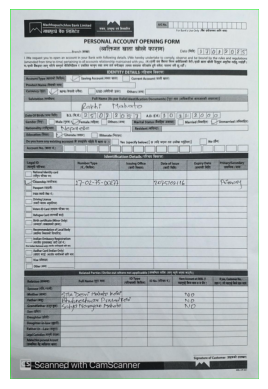

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [13]:
import cv2
import pytesseract
import matplotlib.pyplot as plt


# Path to the Tesseract executable (change as needed for your system)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Windows example

# Load image
image_path = 'D:\Programming\AI\Basics\AMNIL Tech\OCR\ocrimage.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert image to grayscale for better detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use thresholding to enhance text
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours of the text blocks
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours and extract text regions
for contour in contours:
    # Get bounding box of each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Ignore small contours that might not be text blocks
    if w > 50 and h > 50:  # Adjust thresholds for your use case
        print('width:',w)
        print('height:',h)
        # Draw rectangle around detected block
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Extract the block of text from the region
        text_block = image[y:y+h, x:x+w]
        
        # OCR the detected block
        text = pytesseract.image_to_string(text_block)
        print(f"Detected text block: {text.strip()}")

# Show the image with detected text blocks
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


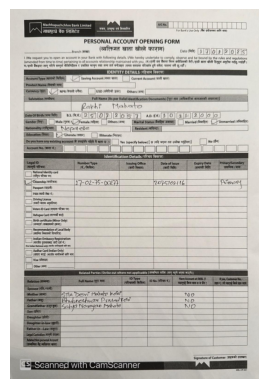

In [18]:

# Load image
image_path = 'D:\Programming\AI\Basics\AMNIL Tech\OCR\ocrimage.jpg'  # Replace with your image path
image = cv2.imread(image_path,cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib

plt.imshow(image_rgb)
plt.axis('off')  # Hide axis for better presentation
plt.show()

In [19]:
from io import BytesIO
import easyocr
import os

reader = easyocr.Reader(['en'])
file_path = 'D:\Programming\AI\Basics\AMNIL Tech\OCR\ocrimage.jpg'

result = reader.readtext(file_path,detail=0,paragraph=True)
for text in result:
    print(text)                                             
                
          


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Machhapuchchhre Bank Limited Tn Je ut vela Jlltnycta ddi Icllalcs
NC No:
For Dank : Uie Only
PERSONAL ACCOUNT OPENING FORM (ufrhnn U1t Uledt TRIF) Branch (MIEU) Date (ftda)
Ne request you t0 open an account In your Bank wlh followIng detalls WWe heteby Undertake t0 corply; observe and be bound 6/ the rules and regulations (amendcd (rom (imc to (Imc) pertaining to all accounts relationshlp malntalnod with You (W4XAn %o Usen |4ea sonn aett A8 /eten EIR eien Ra4 Ajnu 1r/et w/mn arurt ATT "+ ryef Matato eufaa WJI AVII_Weut M 44wrr (ru_MUHITII "tuu 61 "A) "ett n IDENTITY DETAILS(tuM [utvi) Account Type (Urit} frfaa)] Saving Account ( HIldl) Cutrent Account (ah YIiri) Product Name (da currency (u) NPR (Tf adm) USD (anftti 34t) Ouhers (37u) Salutatlon (aur) Full Name (As per Valid Identlfication Documents) [5 AA (#firttfx e FMAuH apittH)) Rakh; Makalo Date Ol Birth 67 nf 8,5,(fd,) 2S 1 AD() Gcnder (6u Male (5om) AFemale (Ream) Others (H7) Marltal Status (aifa 5 #teut) Married (faaifaa) Unmarr